<table>
<tr>
    <td width=25%>
        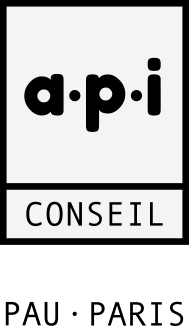
    </td>
    <td>
        <center>
            <h1>TAL et Classification automatique de brevets</h1>
        </center>
    </td>
    <td width=15%>
        Paul Gay<br>
        Ghislain Demonda<br>
        Nicolas Girardin
    </td>
</tr>
</table>

<br/>
<div id="top"></div>
<center>
    <a style="font-size: 20pt; font-weight: bold">Chargement des données</a>
</center>
<br/>

<hr>

Vous disposez de **trois** fichiers textes de type CSV. 

#### Un premier  fichier comporte les données textuelles en anglais pour l'entrainement de votre modèle Anglais

Ce fichier est nommé Claims_EN_A1.

Il est téléchargeable ici : 
https://transfer.private-discuss.com/piT-wkywq5qwy-5YAj

Il fait 2 200 Mo environ (une fois décompressé), avec le caractère "tabulation" comme séparateur et le codage de caractères UTF-8. Il comporte un total de 347 000 lignes environ.
Il comporte 7 "colonnes"  : la colonne 2 comporte les numéros de publications et la colonne 7 comporte le texte des revendications en anglais de la demande de brevet ou du brevet associé au numéro de publication concerné.



#### Un second  fichier comporte les données textuelles en Fançais pour l'entrainement de votre modèle Français

Ce fichier est nommé Claims_FR_A1.

Il est téléchargeable ici : 
https://transfer.private-discuss.com/piT-vkywr3nwi-mdoG


Il fait 5 400 Mo environ (une fois décompressé), avec le caractère "tabulation" comme séparateur et le codage de caractères UTF-8. Il comporte un total de 795 000 lignes environ
Il comporte 7 "colonnes"  : la colonne 2 comporte les numéros de publications et la colonne 7 comporte le texte des revendications en français de la demande de brevet ou du brevet associé au numéro de publication concerné.




#### Un troisième  fichier comporte les données de classification pour l'entrainement de votre modèle.

Nous vous fournissons un fichier CSV comportant toutes les classifications : classification-A1.csv.
Il fait 362 Mo (une fois décompressé) et comporte 12 000 000 lignes environ.

Il peut être téléchargé ici
https://transfer.private-discuss.com/piT-vkywr4x2m-avNt


Ce fichier comportent 5 colonnes. Les colonnes d'interet sont les colonnes 2 et 5.
- la colonne 2 comporte le numéro de publication. 
- la colonne 5 comporte un des codes de classifications attribués à ce numéro de publication (colonne 2).

A noter  : 
- Pour un même numéro de publication il y aura plusieurs numéros de classification. En effet, sur certaines inventions il est nécessaire d'utiliser plusieurs numéros de classification pour les décrire au mieux.
- Les numéros de classifications sont complets : H04B1-38. Il faudra les retraiter car pour rappel nous vous demandons de pouvoir prédire la classe donc par exemple  **H04** et de préférence la sous-classe donc par exemple  **H04B
- Le fichier comporte un nombre de publication plus important que le nombre de publication que vous aurez à traiter
- pour un même numéro de publication, il pourra y avoir des numéro de classification associé à une publication A1 et d'autres associés à une publication B1. Il sera préférable de faire correspondre les revendications d'une demande de brevet EP1645821 **A1** avec les codes de classification de la demande de brevet EP1645821 **A1** et de faire correspondre les revendications d'un brevet EP1645821 **B1** avec les codes de classification du brevet EP1645821 **B1**.

N'oubliez pas : 
- d'équilibrer vos classes.
- de partager vos données en données d'apprentissage et en données de test; sur ce point nous vous fournirons dimanche un jeu de données spécifique pour évaluer la performance de votre solution.
- de proposer une interface de test pour un jeu de revendication

Concernant l'interprétabilité du modèle et sa capacité à déterminer les mots ayant conduit à une classification donnée, vous pourrez vérifier la cohérence des mots sélectionnés par rapport à la classe en vous interessant aux titre des classes ou sous classes : 
https://www.wipo.int/classifications/ipc/en/ITsupport/Version20220101/transformations/viewer/index_fr.htm

https://www.wipo.int/ipc/itos4ipc/ITSupport_and_download_area/20220101/pdf/scheme/full_ipc/fr/index.html


### Vidéo de présentation

La vidéo de présentation du sujet est accessible ici : 
https://video.api-conseil.app/watch/NyaVhYoQ

Le pdf de présentation est disponible ici : 
https://transfer.private-discuss.com/piT-wkywralzb-aoO7


### Format des fichiers

Ce notebook donne un exemple de lecture de ces fichiers, la construction d'un système de classification (idiot) et une évaluation de la précision des prédictions de ce système.

Ces formats sont également décrits via une vidéo : 
https://video.api-conseil.app/watch/sLWzvEQC


#### CONTENU DE Claims_EN_A1.TXT

    	* every line of the text file represents a text portion of the publication
   		* all parts of a single publication are in consecutive lines. Each line ends with a CR/LF
   		* the files are tab-separated value files containing key-value pairs.
   		* the key consists of multiple fields:
            * 1. the publication authority (will always have the value "EP")
            * 2. the publication number (a seven-digit number)
            * 3. the publication kind (use A1 to select the main CLAIM data)
            * 4. the publication date (in format YYYY-MM-DD ; perhaps it can be of use as a feature)
            * 5. the language of the text component (de, en, fr; xx means unknown ; please select EN data for consistencies)
            * 6. the confirmation of CLAIM type data
            * 7. a small integer (mostly with value 1) whose only purpose is to assure that the key is unique, even in the rare case a document contains multiple set of claims in the same language
            * 8. the claim TEXT

Ci dessous est reporté le contenu d'un texte "en colonne 8" associé au numéro de publication "en colonne 2".

Vous pourrez voir que ce champ est largement balisé (balises type html)

"<!-- EPO <DP n="19"> -->
<claim id="c-en-0001" num="0001">
    <claim-text>A substrate working machine comprising:
        <claim-text>a bending device configured to bend a lead of a leaded component inserted into a through-hole formed in a board;</claim-text>
        <claim-text>an imaging device; and</claim-text>
        <claim-text>a control device,</claim-text>
        <claim-text>wherein</claim-text>
        <claim-text>the bending device includes a contacting section configured to bend the lead via contact with the lead, and a main body section to which the contacting section is removably attached, and</claim-text><claim-text>the control device includes
        <claim-text>an imaging section configured to use the imaging device to capture an image of a predetermined imaging target of the contacting section,</claim-text>
        <claim-text>a calculating section configured to calculate position information that is information related to an attachment position of the contacting section on the main body section based on imaging data captured by the imaging section, and</claim-text>
        <claim-text>a calibration performing section configured to perform calibration related to the attachment position of the contacting section to the main body section in a case in which a difference between position information calculated by the calculating section and set position information that is set in advance exceeds a threshold value.</claim-text>
        </claim-text>
    </claim-text>
</claim>
 
 
<claim id="c-en-0002" num="0002">
    <claim-text>The substrate working machine according to claim 1, wherein<br/>the control device further includes a resetting section configured to reset the position information calculated by the calculated by the calculating section as the set position information in a case in which the difference between the position information<!-- EPO <DP n="20"> --> calculated by the calculating section and the set position information that is set in advance exceeds the threshold value.
    </claim-text>
</claim>


<claim id="c-en-0003" num="0003">
    <claim-text>The substrate working machine according to claim 1 or 2, wherein<br/>the contacting section includes a through-hole into which the lead is inserted, and<br/>the lead is bent by the contacting section sliding in a state with the lead inserted into the through-hole.
    </claim-text>
</claim>


<claim id="c-en-0004" num="0004">
    <claim-text>The substrate working machine according to claim 3, wherein<br/>the contacting section is provided with
        <claim-text>a fixed section on which is formed a hole section, and</claim-text>
        <claim-text>a movable section that is slidable with respect to the fixed section and on which the through-hole is formed to overlap with the hole section when viewed from above,</claim-text>
    wherein<br/>the lead is inserted into the hole section and the through-hole with the hole section and the through-hole in an overlapping state, and by the movable section sliding, the lead is cut and bent.
    </claim-text>
</claim>


<claim id="c-en-0005" num="0005">
    <claim-text>The substrate working machine according to claim 4, wherein<br/>the imaging target is formed on the movable section.
    </claim-text>
</claim>


<claim id="c-en-0006" num="0006">
    <claim-text>The substrate working machine according to any one of the claims 1 to 5, wherein<br/><!-- EPO <DP n="21"> -->the main body section includes a pressing surface for pressing a specified wall surface of the contacting section, and<br/>the contacting section is attached to the main body section in a state with the pressing surface pressing the wall surface.
    </claim-text>
</claim>"


Le champ textuel associé aux revendications pourra bénéficier de la suppression de toutes les balises. Notamment les balises de mise en forme "br" ou celles propres à l'OEB comme '!-- EPO DP n="21"' ou 'claim id="c-en-0006" num="0006"'

En outre comme cela a été expliqué dans la vidéo, il pourra être intéressant de faire une analyse revendication par revendication ou de prendre en considération le numéro de la revendication concernée.


  #### CONTENU DE classification-A1-14-35.TXT

EP,1400002,A1,CLASS,H02K41-02
EP,1400002,A1,CLASS,H02K9-19
EP,1400002,A1,CLASS,H02K5-20
EP,1400002,A1,CLASS,H02K1-20
EP,1400003,A1,CLASS,H02K29-00
EP,1400003,A1,CLASS,H02P29-02
EP,1400003,A1,CLASS,H02K21-04
EP,1400003,A1,CLASS,H02P6-34

  

## Lecture des revendications

In [38]:
import csv
import datetime
import sys
csv.field_size_limit(sys.maxsize)
import re
import xml.etree.ElementTree as ET

Chargement des revendications en anglais

In [39]:
datafile = '/home/paul/data/api_conseil/Claims_EN_A1.txt'
data = {}
for f in csv.reader(open(datafile), delimiter='\t'):
    if len(f) == 1:
        continue
    # for each line
    ep = f[1] # publication id
    kind = f[2] # publication type
    date = datetime.datetime.strptime(f[3], "%Y-%m-%d") # date
    lang = f[4] # language
    if lang != 'en':
        continue
    txt_type = f[5] # text type (title, abstract,...)
    types.add(txt_type)
    txt = f[6]
    if ep not in data:
        data[ep] = {}
    data[ep]['kind'] = kind
    data[ep][txt_type] = txt
    if txt_type == 'CLAIM':
        data[ep][txt_type] = ET.fromstring('<claims>'+data[ep][txt_type]+'</claims>')
print('Lecture de', len(data),'brevets')

Lecture de 180037 brevets


In [10]:
pub_ids = list(data.keys())
pub_id = pub_ids[4]
print('Voici les recommendations pour le brevet',pub_id)
print()
#print(data[pub_id]['CLAIM_WO_TAGS'])
for claim in data[pub_id]['CLAIM'].findall('claim'):
    print('claim id :',claim.attrib['id']) # parfois, une première phrase apparait dans un balise claim-text englobant les autres
    for claim_text in claim.findall('claim-text'):
        print(claim_text.text)
        for claim_text in claim_text.findall('claim-text'):
            print(claim_text.text)

Voici les recommendations pour le brevet 1400561

claim id : c-en-0001
A method of producing a coherent rubber composition from particles of rubber which comprises:
(a) coating the rubber particles with a polymeric unsaturated hydrocarbon compound;
(b) mixing the resulting coated rubber particles with a bonding material; and
(c) allowing and/or causing the resulting mixture to form the desired coherent rubber composition.
claim id : c-en-0002
A method according to Claim 1, wherein the polymeric unsaturated hydrocarbon compound is a compound having a long chain aliphatic structure.
claim id : c-en-0003
A method according to Claim 2, wherein the polymeric unsaturated hydrocarbon compound is a polymer of a diene or other polyene.
claim id : c-en-0004
A method according to Claim 3, wherein the polymeric unsaturated hydrocarbon compound is a polymer of 1,3-butadiene.
claim id : c-en-0005
A method according to any of Claims 1 to 4, wherein the polymeric unsaturated hydrocarbon compound has a

### Lecture des étiquettes

In [40]:
import csv
label_file = '/home/paul/data/api_conseil/classification-A1-14-35csv'
labels = {}
for f in csv.reader(open(label_file), delimiter='/t'):
    ep, label_fine_grained = f[1], f[-1]
    label_to_predict = label_fine_grained[:4] # le but est de prédire les 4 premières lettres
    if ep not in labels:
        labels[ep] = {'to_predict': [], 'fine_grained': []}
    labels[ep]['to_predict'].append(label_to_predict)
    labels[ep]['fine_grained'].append(label_fine_grained)

### Association des étiquettes et des revendications

La classification complète des brevets est très précise et regroupe des centaines de milliers de classes. Vous pouvez utiliser cette information pour construire vos modèles.
Cependant, dans le cadre de ce data challenge, il est demandé de prédire seulement une version plus grossière du classement. 


Les étiquettes à prédire pour chaque demande sont ajoutées au dictionnaire `data` avec la clé `labels_to_predict`.



In [41]:
ep_not_labeled = []
for ep in data:
    if str(ep) in labels:
        data[ep]['labels_complete'] = labels[str(ep)]['fine_grained']
        data[ep]['labels_to_predict'] = labels[str(ep)]['to_predict']
    else:
        ep_not_labeled.append(ep)
        #this ep does not have labels, you might remove it from the Data

## Evaluation d'un système idiot

Afin de préciser l'objectif de ce sujet, la cellule suivante implémente un système prédisant une classe au hasard et un oracle afin de tester les fonctions d'évaluation.



In [42]:
def evaluate(predictions, groundtruth):
    """
    fonction d'évaluation. 
    Retourne la précision évaluant la capacité du système à prédire 
    1, 2 ou 3 étiquettes correctes
    """
    corr_1, corr_2, corr_3 = 0, 0, 0
    gt_lengths = []
    for ep, gt_data in groundtruth.items():
        gt_lengths.append(len(gt_data['labels_to_predict']))
        preds = predictions[ep]
        corrects = 0
        for pred in preds:
            if pred in gt_data['labels_to_predict']:
                corrects += 1
        if corrects > 0:
            corr_1 += 1
        if corrects > 1:
            corr_2 += 1
        if corrects > 2:
            corr_3 += 1
    acc_1 = corr_1 / len([1 for l in gt_lengths if l> 0])
    acc_2 = corr_2 / len([1 for l in gt_lengths if l> 1])
    acc_3 = corr_3 / len([1 for l in gt_lengths if l> 2])
    return acc_1, acc_2, acc_3

for ep in ep_not_labeled:
    if ep in data:
        del(data[ep])
# rassembler l'ensemble des étiquettes
label_set = list(set([ l for (ep, values) in data.items() for l in values['labels_to_predict'] ]))
print("La liste d'étiquettes comprend",len(label_set),"classes différentes")
print()
# construction d'un système aléatoire, et d'un système parfait
import random
predictions_random = {}
predictions_oracle = {}
for ep in data:
    random_choices = []
    for i in range(3):
        random_choices.append(random.choice(label_set))
    predictions_random[ep] = random_choices
    predictions_oracle[ep] = data[ep]['labels_to_predict']
    
print('Précisions obtenues par le système aléatoire:')
print(evaluate(predictions_random, data))
print("Précisions obtenues par l'oracle")
print(evaluate(predictions_oracle, data))

La liste d'étiquettes comprend 620 classes différentes

Précisions obtenues par le système aléatoire:
(0.008846359147724745, 5.082223109594511e-05, 0.0)
Précisions obtenues par l'oracle
(1.0, 1.0, 1.0)


Voilà pour le chargement des données et l'évaluation de la classification.

Attention de ne pas négliger la partie interprétabilité du modèle qui est **essentielle** pour ce sujet!

Bon courage!